In [1]:
import os
from datetime import datetime
import pandas as pd

# indicators
import pandas_ta as ta

# for plotting
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp

In [2]:
%matplotlib inline

<h2>Table of Contents</h2>
<ul>
    <a href='#Load-in-data'>Load in data</a><br>
    <a href='#Analysing-data'>Analysing data</a><br>
    <a href='#Adding-features'>Adding features</a>
    <ul>
        <li><a href='#Adding-MACD'>Adding MACD</a></li>
        <li><a href='#Adding-SMA'>Adding SMA</a></li>
        <li><a href='#Adding-RSI'>Adding RSI</a></li>
        <li><a href='#Adding-ROC'>Adding ROC</a></li>
        <li><a href='#Adding-10-days-difference'>Adding 10 days difference</a></li>
    </ul>
    <a href='#Data-cleaning'>Data cleaning</a><br>
    <a href='#Final-plotting'>Final plotting</a><br>
    <a href='#Writing-out-data'>Writing out data</a><br>
</ul>

## Load in data

In [3]:
company_list = pd.read_csv('datasets/all_symbols.txt')
print(f'Currently {company_list.shape[0]} companies are included in the dataset.')

Currently 7483 companies are included in the dataset.


In [4]:
# we are trying to predict for this company
ticker_symbol = 'TSLA'

In [5]:
df = pd.read_csv(f'datasets/full_history/{ticker_symbol}.csv')
df.head(1)

date    volume        open    high          low        close  \
0  2020-07-02  17201300  1221.47998  1228.0  1185.599976  1208.660034   

      adjclose  
0  1208.660034

## Analysing data

In [6]:
# setting date as the index
df['date'] = pd.to_datetime(df['date'])
df.set_index(pd.DatetimeIndex(df['date']), inplace=True)

In [7]:
# sort by date, just in case
df.sort_index(ascending=True, inplace=True)
df.head(1)

date    volume  open  high        low      close   adjclose
date                                                                        
2010-06-29 2010-06-29  18766300  19.0  25.0  17.540001  23.889999  23.889999

Rows: 2521
Columns: 7
Date range: 2010/06/29 - 2020/07/02


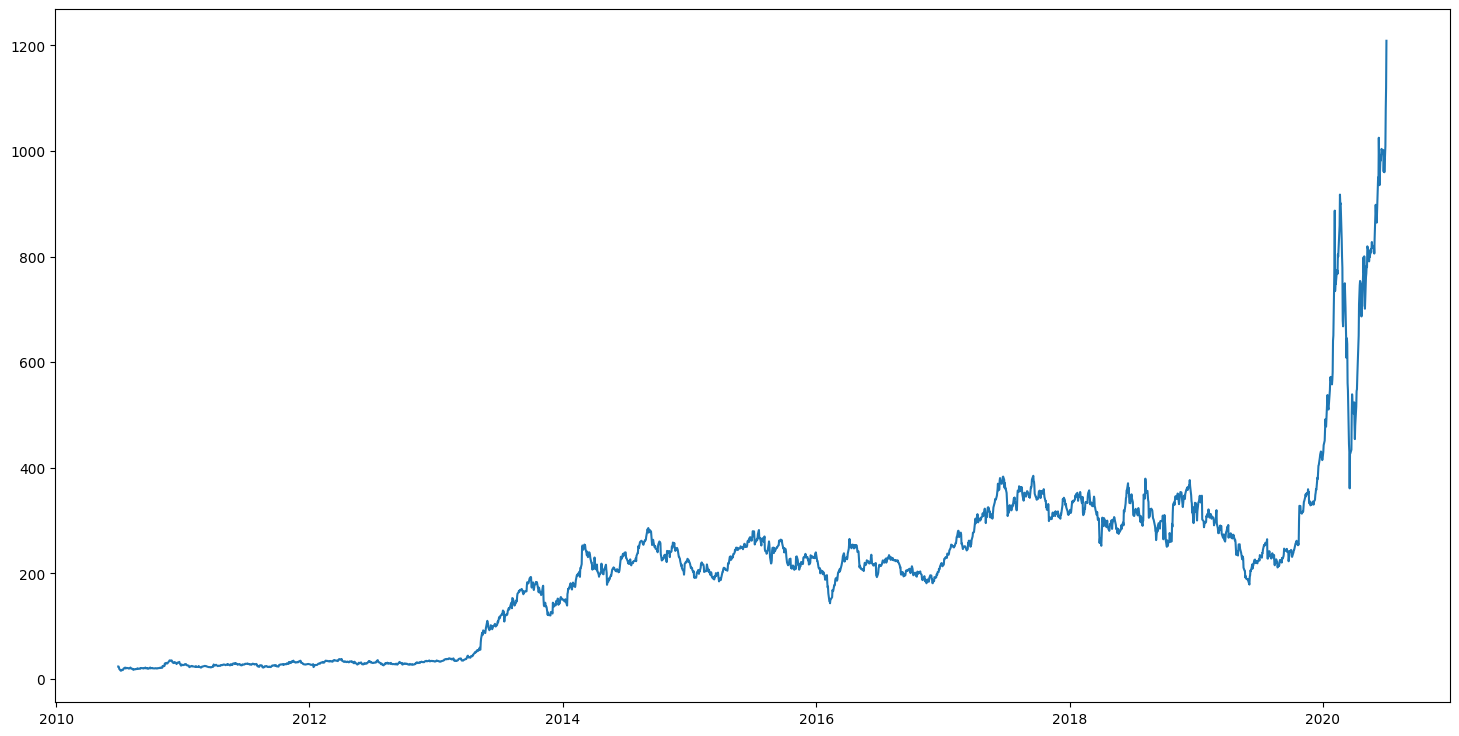

In [8]:
# information about our data
print(f'Rows: {df.shape[0]}')
print(f'Columns: {df.shape[1]}')
start_date_str = df.index[0].strftime(f'%Y/%m/%d')
end_date_str = df.index[df.shape[0]-1].strftime(f'%Y/%m/%d')
print(f'Date range: {start_date_str} - {end_date_str}')

plt.figure(figsize = (18,9))
plt.plot(df.index, df['close'])
plt.show()

In [9]:
# setting some constants for later
START_DATE = df.index[0]
END_DATE = df.index[df.shape[0]-1]

# Adding features

- indicators
- other self-made features

In [10]:
expanded_df = df.copy()

### Adding MACD

In [11]:
expanded_df.ta.macd(append=True)
expanded_df.tail(3)

date    volume        open         high          low  \
date                                                                    
2020-06-30 2020-06-30  16918500  1006.50000  1087.689941  1003.729980   
2020-07-01 2020-07-01  13326900  1083.00000  1135.329956  1080.500000   
2020-07-02 2020-07-02  17201300  1221.47998  1228.000000  1185.599976   

                  close     adjclose  MACD_12_26_9  MACDh_12_26_9  \
date                                                                
2020-06-30  1079.810059  1079.810059     47.475536      -0.727075   
2020-07-01  1119.630005  1119.630005     54.122328       4.735773   
2020-07-02  1208.660034  1208.660034     65.815261      13.142965   

            MACDs_12_26_9  
date                       
2020-06-30      48.202612  
2020-07-01      49.386555  
2020-07-02      52.672296

#### Quick plot

In [12]:
start_date = '2019-01-01'
end_date = END_DATE
plotted_data = expanded_df.loc[start_date:end_date]

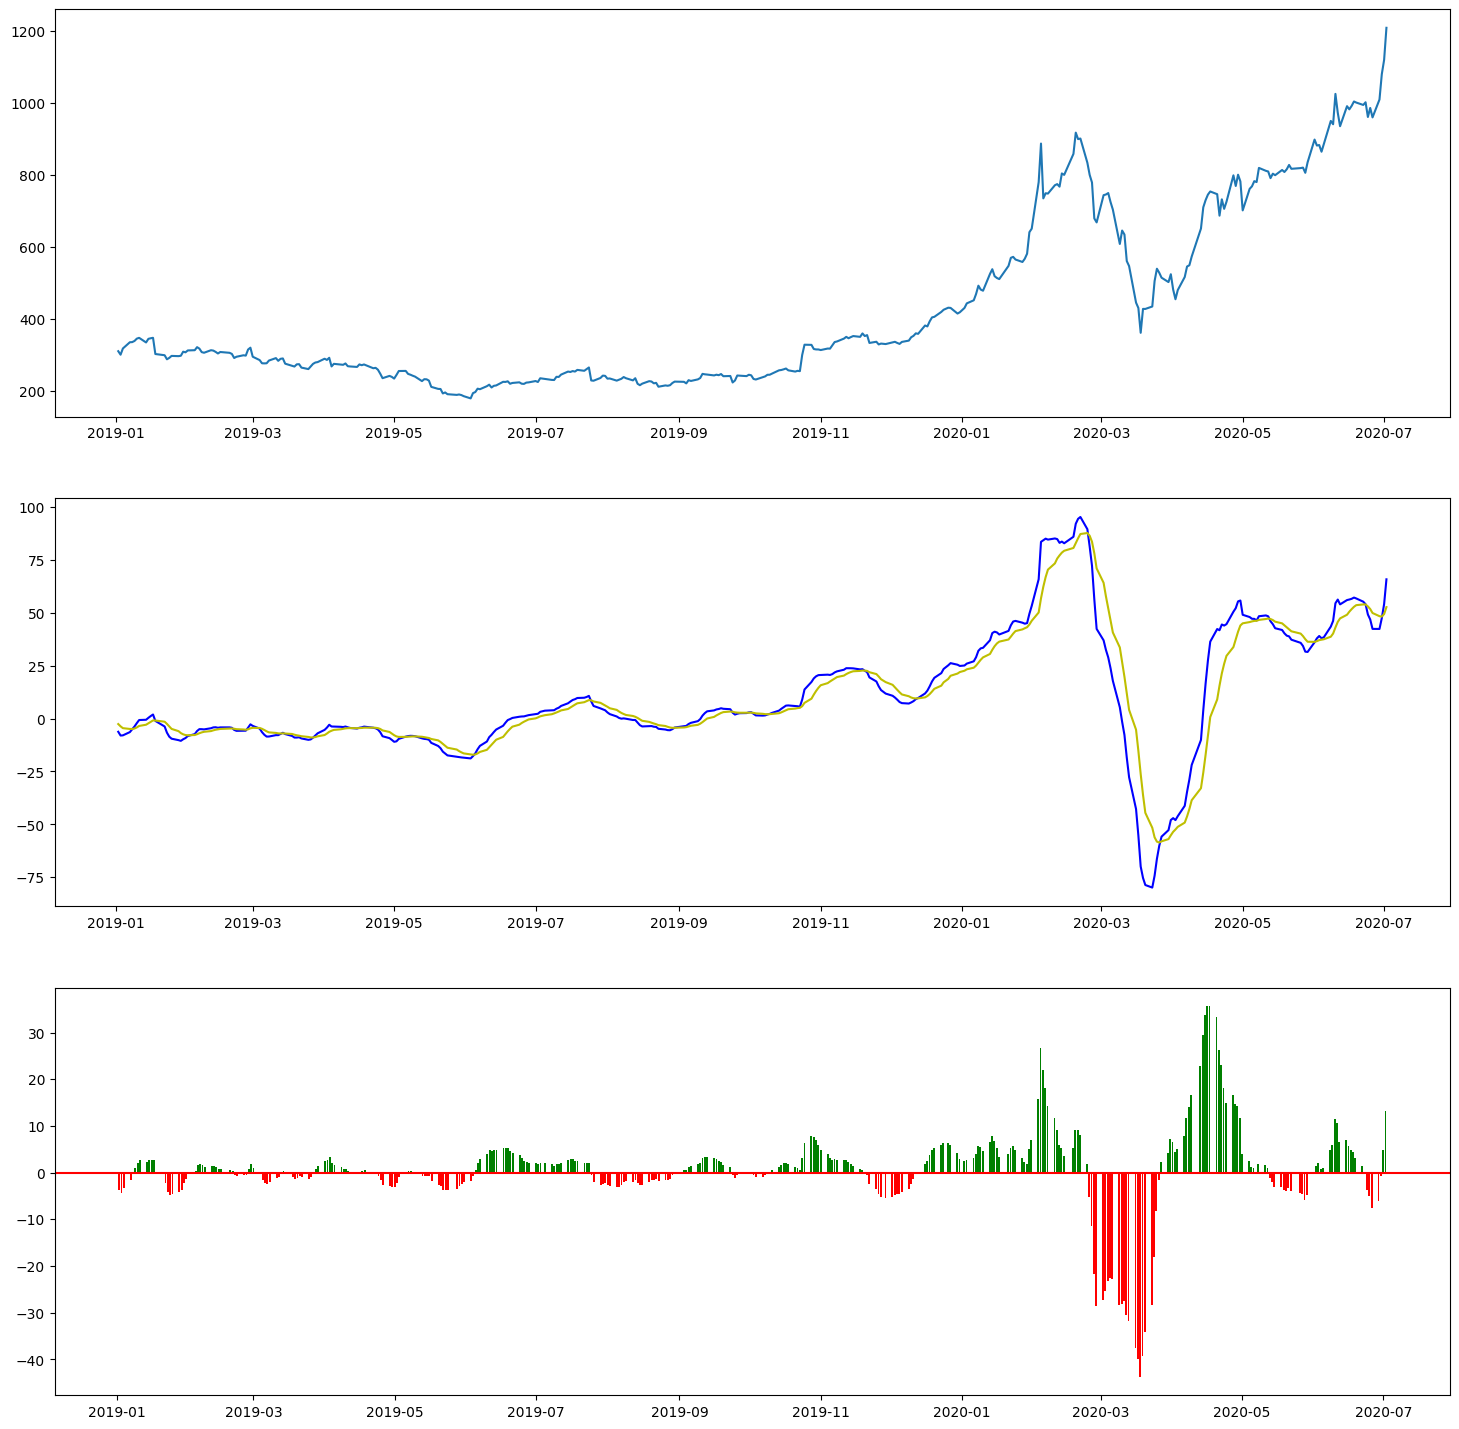

In [13]:
plt.figure(1, figsize=(18, 18))

plt.subplot(311)
plt.plot(plotted_data.loc[:, 'adjclose'])

plt.subplot(312)
plt.plot(plotted_data.loc[:, 'MACD_12_26_9'], 'b') # MACD line
plt.plot(plotted_data.loc[:, 'MACDs_12_26_9'], 'y') # signal line

plt.subplot(313)
bar_color = ['g' if value > 0 else 'r' for value in plotted_data.loc[:, 'MACDh_12_26_9']]
plt.bar(
    x=plotted_data.index, 
    height=plotted_data.loc[:, 'MACDh_12_26_9'],
    color=bar_color)
plt.axhline(0, color='r')

plt.show()

### Adding SMA
https://www.investopedia.com/terms/s/sma.asp

Smooths out data, and gives a general trend of the price.

In [14]:
# the following SMAs will be added
# generally used numbers = 50, 200
sma_lengths = [50, 200]

In [15]:
for length in sma_lengths:
    expanded_df.ta.sma(length=length, append=True)
expanded_df.head(3)

date    volume       open   high        low      close  \
date                                                                      
2010-06-29 2010-06-29  18766300  19.000000  25.00  17.540001  23.889999   
2010-06-30 2010-06-30  17187100  25.790001  30.42  23.299999  23.830000   
2010-07-01 2010-07-01   8218800  25.000000  25.92  20.270000  21.959999   

             adjclose  MACD_12_26_9  MACDh_12_26_9  MACDs_12_26_9  SMA_50  \
date                                                                        
2010-06-29  23.889999           NaN            NaN            NaN     NaN   
2010-06-30  23.830000           NaN            NaN            NaN     NaN   
2010-07-01  21.959999           NaN            NaN            NaN     NaN   

            SMA_200  
date                 
2010-06-29      NaN  
2010-06-30      NaN  
2010-07-01      NaN

#### Quick plot

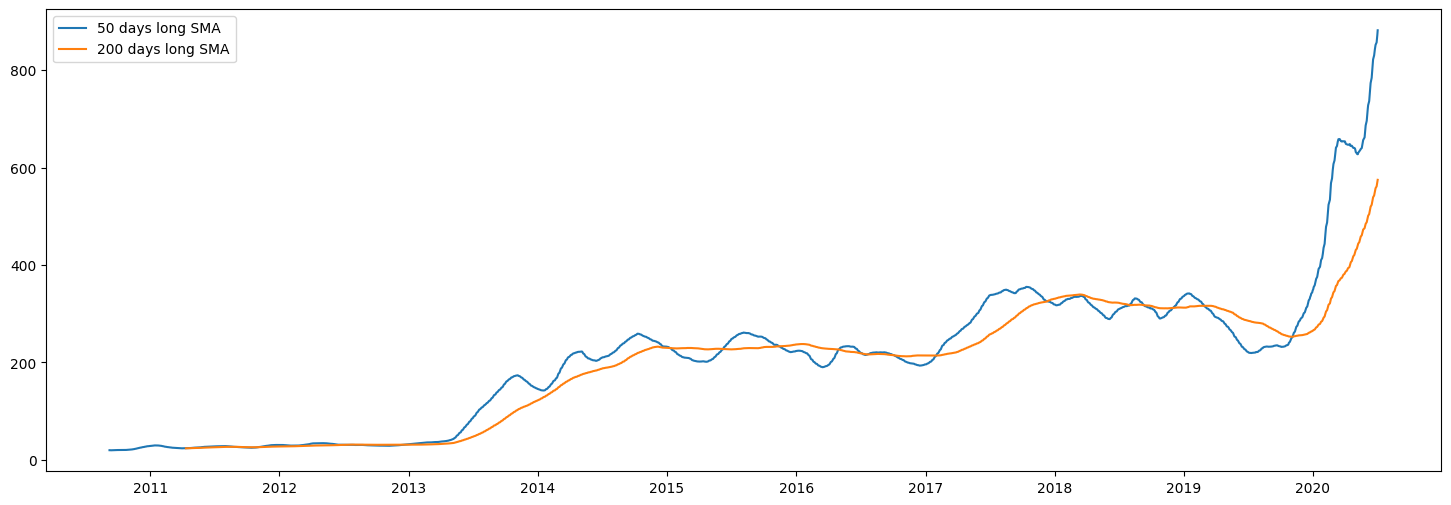

In [16]:
plt.figure(figsize=(18, 6))

for length in sma_lengths:
    plt.plot(expanded_df[f'SMA_{length}'], label=f'{length} days long SMA')

plt.legend()
plt.show()

### Adding RSI
https://www.investopedia.com/articles/active-trading/042114/overbought-or-oversold-use-relative-strength-index-find-out.asp

Shows if a stock is overbought or oversold.
- RSI < 30 => oversold, undervalued => should buy
- RSI > 70 => overbought, overvalued => should sell
- In between => neutral

In [17]:
expanded_df.ta.rsi(append=True)
expanded_df.tail(3)

date    volume        open         high          low  \
date                                                                    
2020-06-30 2020-06-30  16918500  1006.50000  1087.689941  1003.729980   
2020-07-01 2020-07-01  13326900  1083.00000  1135.329956  1080.500000   
2020-07-02 2020-07-02  17201300  1221.47998  1228.000000  1185.599976   

                  close     adjclose  MACD_12_26_9  MACDh_12_26_9  \
date                                                                
2020-06-30  1079.810059  1079.810059     47.475536      -0.727075   
2020-07-01  1119.630005  1119.630005     54.122328       4.735773   
2020-07-02  1208.660034  1208.660034     65.815261      13.142965   

            MACDs_12_26_9      SMA_50     SMA_200     RSI_14  
date                                                          
2020-06-30      48.202612  863.726201  565.681651  68.255192  
2020-07-01      49.386555  872.384402  570.065751  71.272716  
2020-07-02      52.672296  881.915403  574.885101  76.623106

#### Quick plot

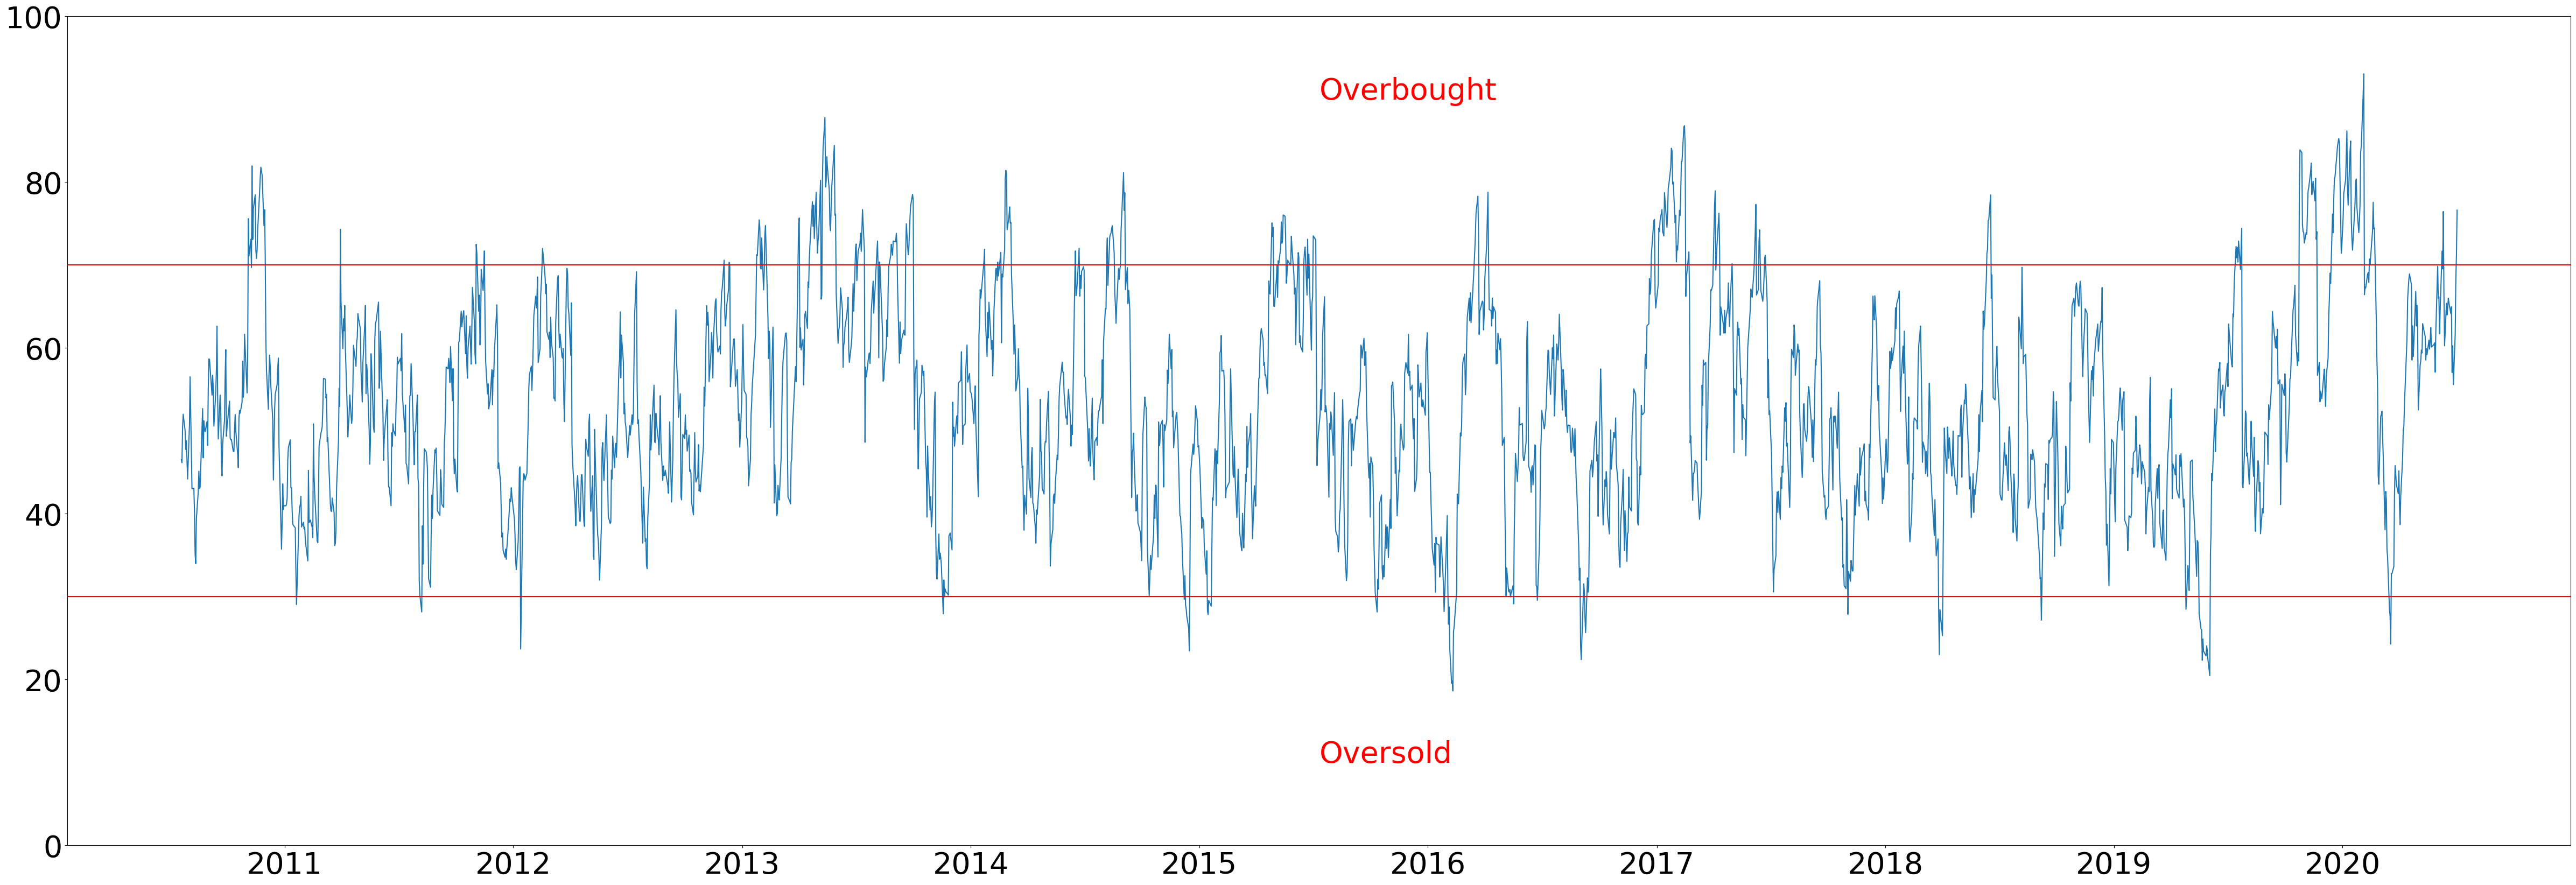

In [18]:
plt.figure(figsize=(60,20))
plt.plot(expanded_df['RSI_14'])

plt.axhline(30, color='r')
plt.axhline(70, color='r')

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.ylim(0, 100)

plt.text(x=sum(plt.xlim())/2, y=90, 
         s='Overbought',
         color='r', fontsize=40)
plt.text(x=sum(plt.xlim())/2, y=10, 
         s='Oversold',
         color='r', fontsize=40)

plt.show()

### Adding ROC
https://www.investopedia.com/terms/p/pricerateofchange.asp

Momentum indicator, that shows the precentage change between the current and the price X periods before.

Shows trends:
- positive ROC => uptrend
- negative ROC => downtrend

In [19]:
# generally used numbers = 14
expanded_df.ta.roc(length=14, append=True)
expanded_df.tail(3)

date    volume        open         high          low  \
date                                                                    
2020-06-30 2020-06-30  16918500  1006.50000  1087.689941  1003.729980   
2020-07-01 2020-07-01  13326900  1083.00000  1135.329956  1080.500000   
2020-07-02 2020-07-02  17201300  1221.47998  1228.000000  1185.599976   

                  close     adjclose  MACD_12_26_9  MACDh_12_26_9  \
date                                                                
2020-06-30  1079.810059  1079.810059     47.475536      -0.727075   
2020-07-01  1119.630005  1119.630005     54.122328       4.735773   
2020-07-02  1208.660034  1208.660034     65.815261      13.142965   

            MACDs_12_26_9      SMA_50     SMA_200     RSI_14     ROC_14  
date                                                                     
2020-06-30      48.202612  863.726201  565.681651  68.255192   5.342179  
2020-07-01      49.386555  872.384402  570.065751  71.272716  15.088809  
2020-07-02      52.672296  881.915403  574.885101  76.623106  29.229749

#### Quick plot

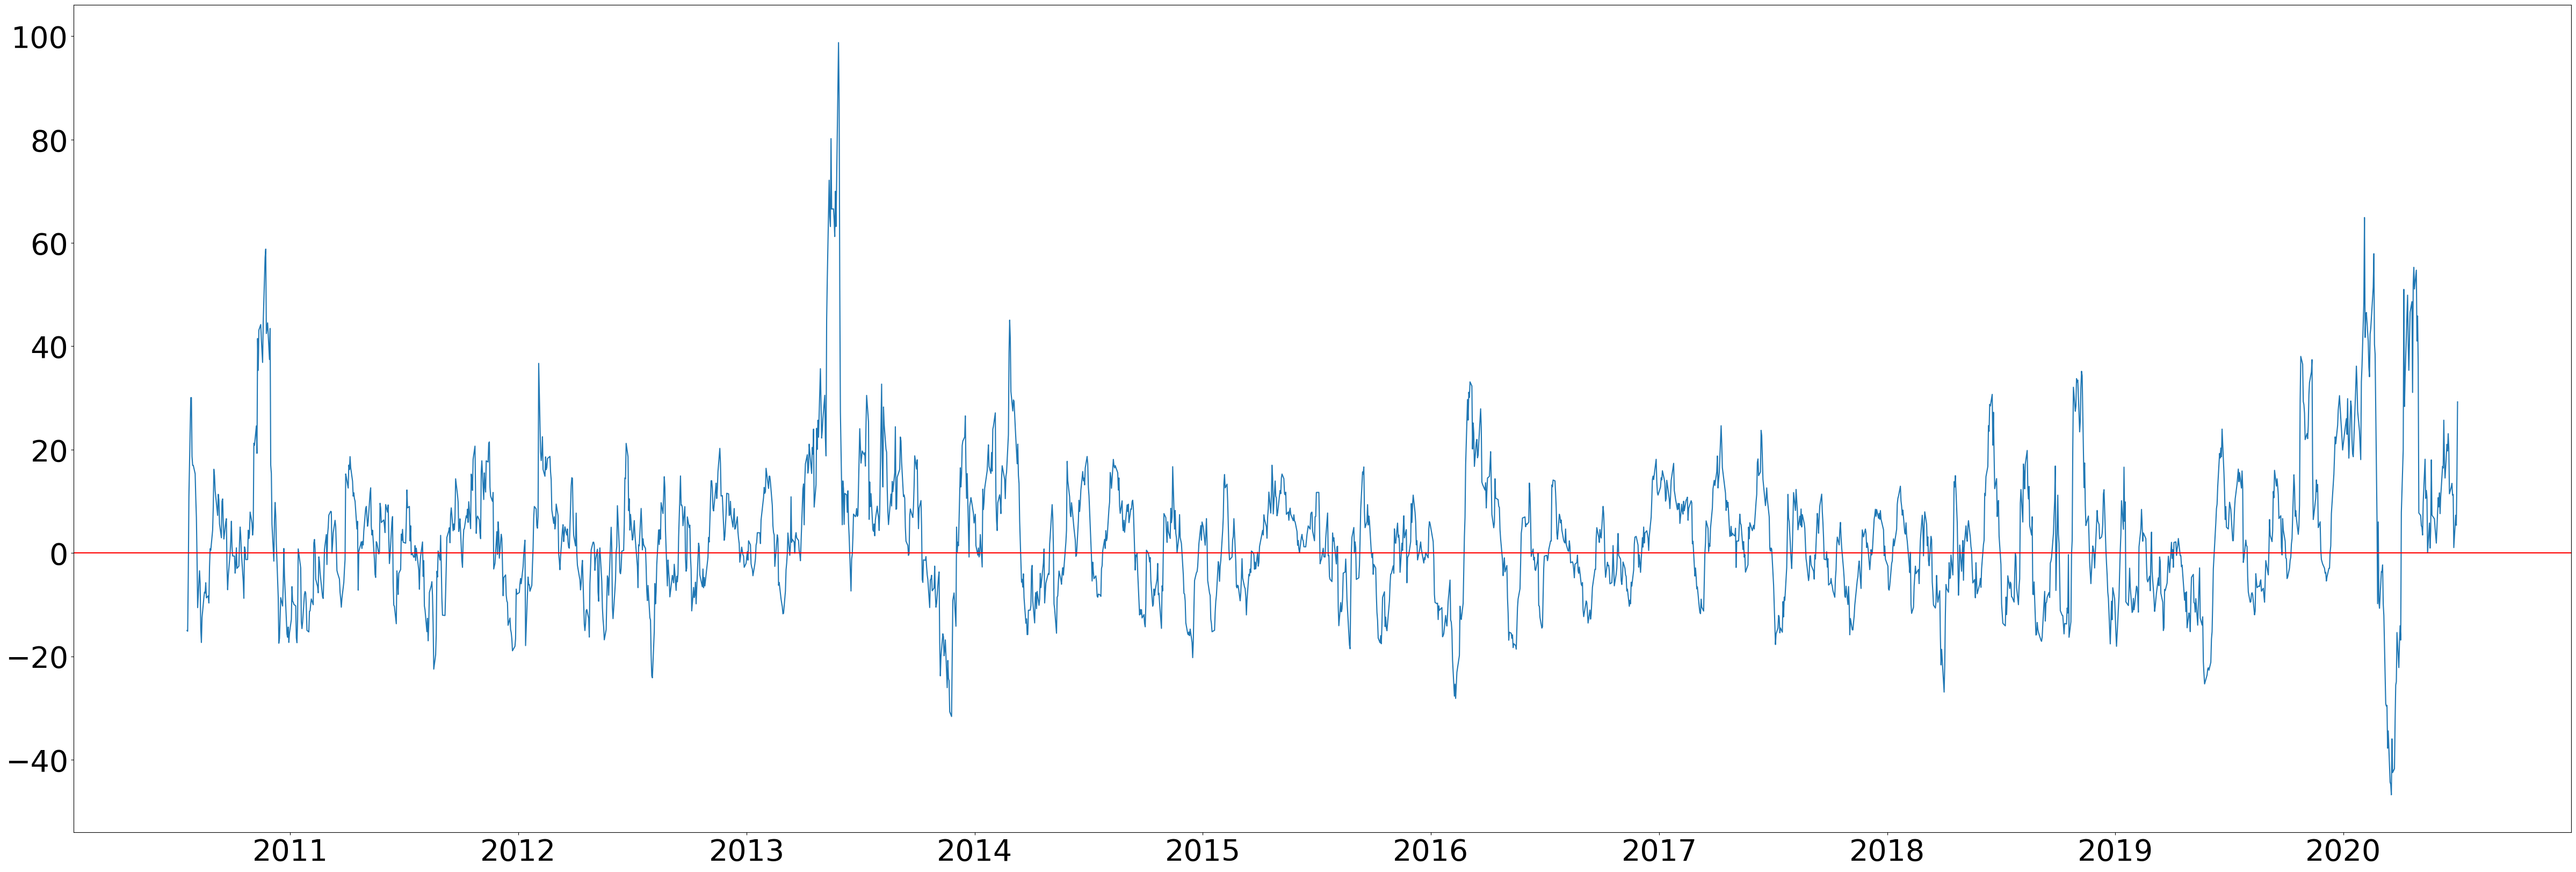

In [20]:
plt.figure(figsize=(60,20))

plt.plot(expanded_df['ROC_14'])

plt.axhline(0, color='r')

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.show()

In [21]:
# TODO:
# EMA, BBand, mom, cci, moving average crossovers
# default values should be used (yahoo finance, investing.com)

## Adding 10 days difference
We will take the difference between the future (close) price and the current (close) price. So the change in this time period.

**This will be the feature that we are trying to predict, so this feature should be added as the last feature to the dataframe!**

In [22]:
# QUESTION: 10 days with weekends or without them? (can try both scenarios)
# TODO: ROC is almost the same thing, but in % (so we could remove this later)

difference_range = 10 # days

In [23]:
expanded_df[f'DIFF_{difference_range}'] = expanded_df['close'].diff(periods=difference_range)
expanded_df.tail(3)

date    volume        open         high          low  \
date                                                                    
2020-06-30 2020-06-30  16918500  1006.50000  1087.689941  1003.729980   
2020-07-01 2020-07-01  13326900  1083.00000  1135.329956  1080.500000   
2020-07-02 2020-07-02  17201300  1221.47998  1228.000000  1185.599976   

                  close     adjclose  MACD_12_26_9  MACDh_12_26_9  \
date                                                                
2020-06-30  1079.810059  1079.810059     47.475536      -0.727075   
2020-07-01  1119.630005  1119.630005     54.122328       4.735773   
2020-07-02  1208.660034  1208.660034     65.815261      13.142965   

            MACDs_12_26_9      SMA_50     SMA_200     RSI_14     ROC_14  \
date                                                                      
2020-06-30      48.202612  863.726201  565.681651  68.255192   5.342179   
2020-07-01      49.386555  872.384402  570.065751  71.272716  15.088809   
2020-07-02      52.672296  881.915403  574.885101  76.623106  29.229749   

               DIFF_10  
date                    
2020-06-30   97.680054  
2020-07-01  127.840027  
2020-07-02  204.700012

## Data cleaning
TODO: could try filling missing values (with backfill)

In [24]:
print(f'Original shape: {expanded_df.shape}')
expanded_df.dropna(axis=0, inplace=True)
print(f'Resulting shape: {expanded_df.shape}')

Original shape: (2521, 15)
Resulting shape: (2322, 15)


# Final plotting

In [25]:
plotted_df = expanded_df.copy()

In [26]:
# extra variables for better plotting
shown_range_start = END_DATE - pd.Timedelta(days=200)
shown_range_end = END_DATE

# used for bar colors
plotted_df['MACDh_12_26_9_col'] = plotted_df['MACDh_12_26_9'] > 0 

### Price chart

In [27]:
# making price chart
price_chart = px.area(plotted_df, y=['close'], title ='Close prices')
price_chart.update_xaxes(title_text='Date')
price_chart.update_yaxes(title_text='Close Price', tickprefix='$')

price_chart.show()

### MACD indicator

In [28]:
fig = go.Figure()

# adding macd line
fig.add_trace(
    go.Scatter(
        x=plotted_df['date'], 
        y=plotted_df['MACD_12_26_9'],
        name='MACD line',
        line_color='blue'
    )
)

# adding signal line
fig.add_trace(
    go.Scatter(
        x=plotted_df['date'], 
        y=plotted_df['MACDs_12_26_9'],
        name='Signal line',
        line_color='orange'
    )
)

# adding bars
bar_chart = px.bar(plotted_df,
                    x='date',
                    y='MACDh_12_26_9',
                    color='MACDh_12_26_9_col',
                    color_discrete_map={True: 'green', False: 'red'},
                    range_x=[shown_range_start, shown_range_end])
fig.add_trace(bar_chart.data[0]) # negative (red) bars
fig.add_trace(bar_chart.data[1]) # positive (green) bars
# we don't want their legends
fig.update_traces(selector=dict(name='False'), showlegend=False)
fig.update_traces(selector=dict(name='True'), showlegend=False)

fig.update_xaxes(
    title_text='Date', 
    range=[shown_range_start, shown_range_end]
)

fig.update_layout(
    title='MACD indicator',   
    title_x=0.5,
    bargap=0)

fig.show()

#### Multiple indicators

In [29]:
# creating a figure wiht subplots for all the different indicators
fig = sp.make_subplots(
    rows=4, cols=1, 
    shared_xaxes=True, 
    row_heights=[0.60, 0.10, 0.15, 0.15],
    vertical_spacing=0.03)

In [30]:
# Closing prices
close_pos = (1, 1)

fig.add_trace(
    go.Scatter(
         x=plotted_df['date'], 
         y=plotted_df['close'],
         name='Closing price',
         line_color='blue',
    ),
    row=close_pos[0], col=close_pos[0]
)
fig.update_yaxes(
    title_text='Close Price', 
    tickprefix='$',
    row=close_pos[0], col=close_pos[0]
)

# SMA
sma_names = []
for length in sma_lengths:
    sma_names.append(f'SMA_{length}')
# creating SMA lines
SMA_lines = px.line(
    plotted_df, 
    x='date', 
    y=sma_names)
# adding lines to figure
for i in range(len(sma_lengths)):
    fig.add_trace(
        SMA_lines.data[i],
        row=close_pos[0], col=close_pos[0])
    fig.update_traces(
        name=f'{sma_lengths[i]} days long SMA', 
        selector=dict(name=SMA_lines.data[i].name), 
        #hovertemplate=f'{sma_lengths[i]} days long SMA: %{{y}}',   TODO
        row=close_pos[0], col=close_pos[0])
    
print('Closing price and SMAs have been added to first subplot!')

Closing price and SMAs have been added to first subplot!


In [31]:
# RSI
rsi_pos = (3,1)

fig.add_trace(
    go.Scatter(
        x=plotted_df['date'], 
        y=plotted_df['RSI_14'],
        name='RSI',
        line_color='orange'),
    row=rsi_pos[0], col=rsi_pos[1]
)
# adding horizontal lines
line_y_positions = [30, 70]
for y_position in line_y_positions:
    fig.add_shape(
        type='line',
        x0=START_DATE, x1=END_DATE,
        y0=y_position, y1=y_position,
        line=dict(color='red', width=2),
        row=rsi_pos[0], col=rsi_pos[1]
    )
# changing y range
fig.update_yaxes(range=[0, 100], row=rsi_pos[0], col=rsi_pos[1])

print('RSI added to second subplot!')

RSI added to second subplot!


In [32]:
# ROC
roc_pos = (4,1)

fig.add_trace(
    go.Scatter(
        x=plotted_df['date'], 
        y=plotted_df['ROC_14'],
        name='ROC',
        line_color='brown'),
    row=roc_pos[0], col=roc_pos[1]
)

print('ROC added to first subplot!')

ROC added to first subplot!


In [33]:
# changing x axis to a specified range
fig.update_xaxes(
    range=[shown_range_start, shown_range_end]
)

# general settings
fig.update_layout(
    title='Indicator plot',
    height=1200,
    title_x=0.5,
    hovermode='x unified',
    xaxis_rangeslider_visible=True,
    xaxis_rangeslider_thickness=0.1
)

# showing a pretty plot
fig.show()

NameError: name 'data_end' is not defined

In [ ]:
# TODO
# add more indicator plots
# add better legends (also better positions)
# add titles for each subplot
# llok into using dash, for more interactivity

## Writing out data

In [ ]:
expanded_df.head()

In [ ]:
# setting up folder for ticker, if there isn't any
path = f'processed_data/{ticker_symbol}'
if not os.path.exists(path):
    os.mkdir(path)

In [ ]:
timestamp = datetime.now().strftime('%Y_%m_%d_%H_%M_%S')
expanded_df.to_csv(f'{path}/{timestamp}.csv', index=False)